The format of the skeleton file is as follows. 
* The first integer is the number of frames. 
* The second integer is the number of joints which is always 20. 
* For each frame, the first integer is the number of rows. 
* This integer is 40 when there is exactly one skeleton being detected in this frame. 
* It is zero when no skeleton is detected. 
* It is 80 when two skeletons are detected (in that case which is rare, we simply use the first skeleton in our experiments). 
* For most of the frames, the number of rows is 40. Each joint corresponds to two rows. 
* The first row is its real world coordinates (x,y,z) and the second row is its screen coordinates plus depth (u, v, depth) where u and v are normalized to be within [0,1]. 
* For each row, the integer at the end is supposed to be the confidence value, but it is not useful.

In [7]:
# change the working directory
# access to depth, rgb and skeleton files 
rgb_data = 'data/MSRDailypack1/rgb'
rgb_frames = 'data/MSRDailypack1/rgb_frames'
skeleton_data = 'data/MSRDailypack1/skeleton'
depth_data = 'data/MSRDailypack1/depth'

## Export frames from Skeletons

In [50]:
import numpy as np
import cv2
import glob
import csv
import os
import os.path

In [51]:

def get_filename(path):
    return path.split('/')[3].split('.')[0]

def get_action_parts(path):
    action, subject, instance, s = path.split('/')[3].split('.')[0].split('_')
    return action, subject, instance

def get_joint(row1,row2):
    x,y,z = row1.split(' ')[0],row1.split(' ')[1], row1.split(' ')[2]
    u,v,depth = row2.split(' ')[0],row2.split(' ')[1], row2.split(' ')[2] 
    return np.array([[x,y,z],[u,v,depth]],np.float32)        # get a joint
    

    
#main    

dir = glob.glob(skeleton_data+'/*')

action_joints = []

for filepath in dir:# for each file in folder
    with open(filepath, "r") as file:#read file
        nb_frames = file.readline().strip().split(' ')[0] # total frames
        print("file: "+get_filename(filepath)+'/ Frames : '+ nb_frames)
        
        nb_data_vals = file.readline().strip()
        filejoints = []
        
        while nb_data_vals == '40':      

            for i in range(int(int(nb_data_vals)/2)):
                row1 = file.readline().strip()
                #x,y,z = row1.split(' ')[0],row1.split(' ')[1], row1.split(' ')[2]

                row2 = file.readline().strip()
                #u,v,depth = row2.split(' ')[0],row2.split(' ')[1], row2.split(' ')[2]       

                #joint = np.array([x,y,z,u,v,depth],np.float32)        # get a joint
                joint = get_joint(row1,row2)
                #print(i)
                #print(joint[:3])  # x,y,z
                #print(joint[3:5]) #,u,v
                #print(joint[5]) #depth
                #print(joint.shape)
                #print(joint.ndim)
                #print(joint.dtype)
                filejoints.append(joint)
            nb_data_vals = file.readline().strip()
        print('Joints collected: '+str(len(filejoints)))    
        action_joints.append(filejoints)       
    
print('total action joints collected :'+str(len(action_joints)))

file: a08_s09_e02_skeleton/ Frames : 199
Joints collected: 3980
file: a14_s05_e02_skeleton/ Frames : 210
Joints collected: 4200
file: a16_s07_e02_skeleton/ Frames : 96
Joints collected: 1920
file: a15_s04_e01_skeleton/ Frames : 105
Joints collected: 2100
file: a12_s02_e02_skeleton/ Frames : 172
Joints collected: 3440
file: a16_s04_e02_skeleton/ Frames : 176
Joints collected: 3520
file: a11_s04_e01_skeleton/ Frames : 193
Joints collected: 3860
file: a12_s07_e02_skeleton/ Frames : 155
Joints collected: 3100
file: a14_s09_e02_skeleton/ Frames : 196
Joints collected: 3920
file: a12_s08_e01_skeleton/ Frames : 117
Joints collected: 2340
file: a15_s09_e01_skeleton/ Frames : 97
Joints collected: 1940
file: a16_s07_e01_skeleton/ Frames : 94
Joints collected: 1880
file: a08_s03_e02_skeleton/ Frames : 214
Joints collected: 4280
file: a16_s05_e01_skeleton/ Frames : 134
Joints collected: 2680
file: a15_s05_e02_skeleton/ Frames : 125
Joints collected: 2500
file: a10_s07_e02_skeleton/ Frames : 106
Jo

Joints collected: 4920
file: a12_s05_e02_skeleton/ Frames : 189
Joints collected: 3780
file: a11_s04_e02_skeleton/ Frames : 246
Joints collected: 4920
file: a11_s09_e02_skeleton/ Frames : 182
Joints collected: 3640
file: a08_s02_e01_skeleton/ Frames : 93
Joints collected: 1860
file: a15_s10_e01_skeleton/ Frames : 79
Joints collected: 1580
file: a04_s01_e01_skeleton/ Frames : 251
Joints collected: 5020
file: a04_s02_e02_skeleton/ Frames : 285
Joints collected: 5700
file: a11_s05_e02_skeleton/ Frames : 231
Joints collected: 4620
file: a10_s06_e02_skeleton/ Frames : 159
Joints collected: 3180
file: a12_s05_e01_skeleton/ Frames : 185
Joints collected: 3700
file: a16_s03_e02_skeleton/ Frames : 180
Joints collected: 3600
file: a13_s06_e01_skeleton/ Frames : 255
Joints collected: 2500
file: a04_s04_e02_skeleton/ Frames : 224
Joints collected: 4480
file: a07_s07_e02_skeleton/ Frames : 231
Joints collected: 4620
file: a11_s03_e02_skeleton/ Frames : 245
Joints collected: 4900
file: a08_s09_e01_s

Joints collected: 2600
file: a12_s10_e02_skeleton/ Frames : 112
Joints collected: 2240
file: a02_s02_e01_skeleton/ Frames : 190
Joints collected: 3800
file: a03_s08_e01_skeleton/ Frames : 172
Joints collected: 3440
file: a05_s09_e01_skeleton/ Frames : 224
Joints collected: 4480
file: a07_s06_e01_skeleton/ Frames : 296
Joints collected: 5920
file: a05_s04_e01_skeleton/ Frames : 204
Joints collected: 4080
file: a07_s03_e02_skeleton/ Frames : 244
Joints collected: 4880
file: a14_s09_e01_skeleton/ Frames : 135
Joints collected: 2700
file: a10_s03_e02_skeleton/ Frames : 116
Joints collected: 2320
file: a10_s10_e02_skeleton/ Frames : 115
Joints collected: 2300
file: a01_s04_e01_skeleton/ Frames : 164
Joints collected: 3280
file: a03_s10_e02_skeleton/ Frames : 184
Joints collected: 3680
file: a11_s01_e01_skeleton/ Frames : 133
Joints collected: 2660
file: a08_s01_e01_skeleton/ Frames : 109
Joints collected: 2180
file: a05_s08_e02_skeleton/ Frames : 206
Joints collected: 4120
file: a13_s08_e01

In [ ]:
# find 80 wala file khatam
dir = glob.glob(skeleton_data+'/*')

for file in dir:
    f = open(file,'r')
    l =0
    for x in f:
        l =l+1
        if x.strip() =='80':
            print(x)
            print(file)
            print(l)
    
          
print(len(dir))

In [ ]:
action_joints # is a a multilayered list 
# first layer actions
# second layer joints of each action

In [52]:
# convert list to numpy and save it Numpy format
import numpy
from numpy import save
  
# initilizing list 
#seq
  
# converting list to array 
seqs_np = numpy.array(action_joints) 
  
# displaying list 
#print ("List: ", seqs) 
  
# displaying array 
#print ("Array: ", seqs_np) 


save('action_joints.npy', seqs_np)
print('Total Skeletal Sequences saved: '+str(len(seqs_np)))

Total Skeletal Sequences saved: 320


In [53]:
# load numpy format
from numpy import load


data = np.load('action_joints.npy',allow_pickle=True)
# print the array

print('Total Skeletal Sequences loaded: '+str(len(data)))

Total Skeletal Sequences loaded: 320


## Extract Joints from Skl Sequences

In [43]:
action_joints[0][0][0]

array([ 0.139539 , -0.0254433,  2.0859   ], dtype=float32)

<ipython-input-56-e39b740ebb54>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


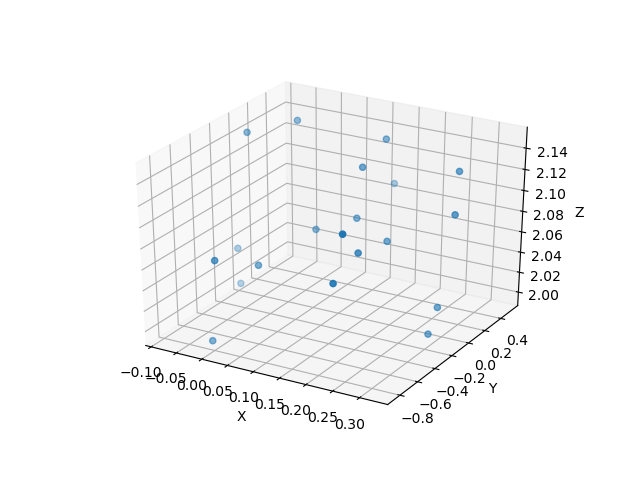

<IPython.core.display.Javascript object>


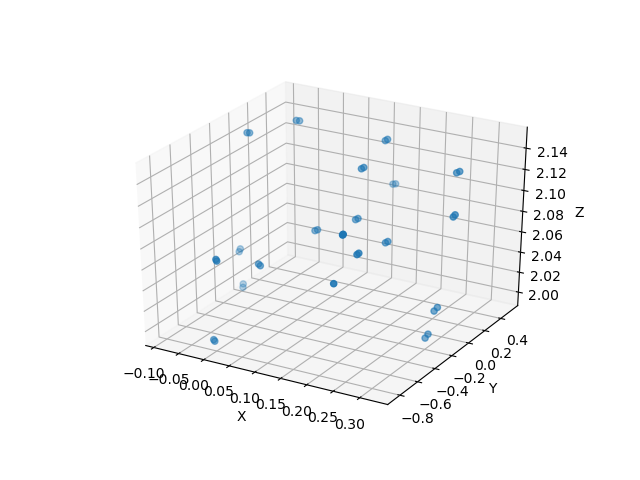

<IPython.core.display.Javascript object>


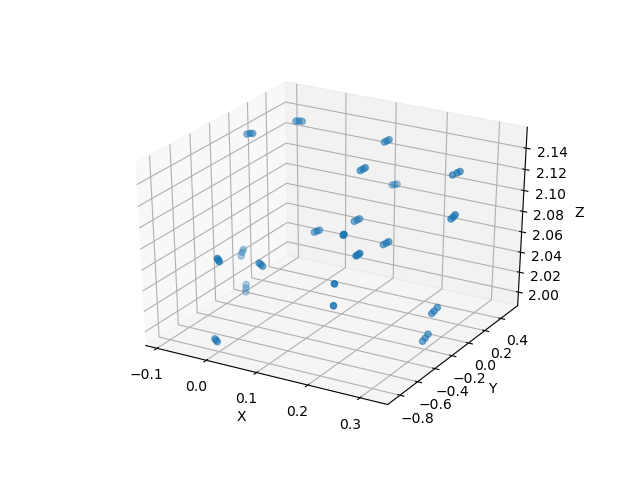

<IPython.core.display.Javascript object>


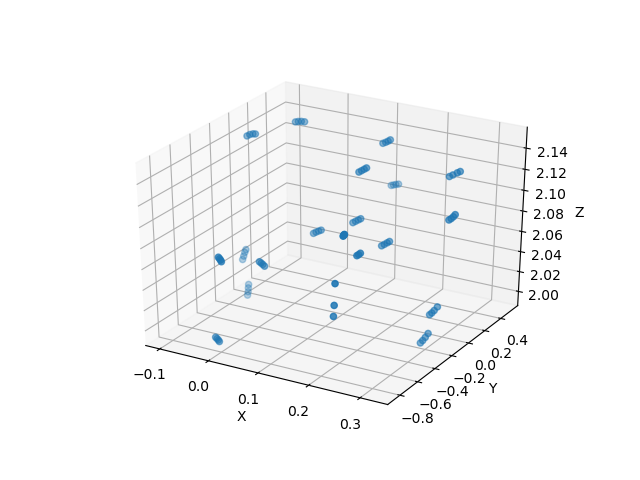

<IPython.core.display.Javascript object>


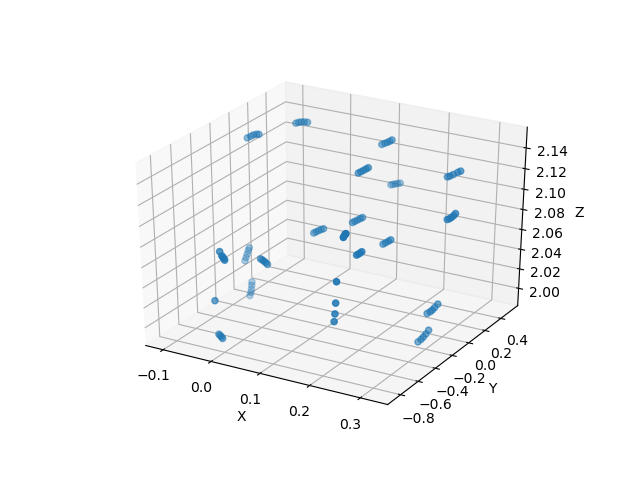

<IPython.core.display.Javascript object>


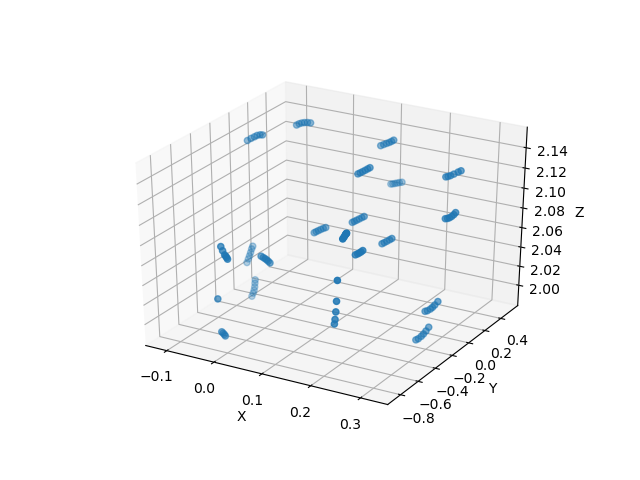

<IPython.core.display.Javascript object>


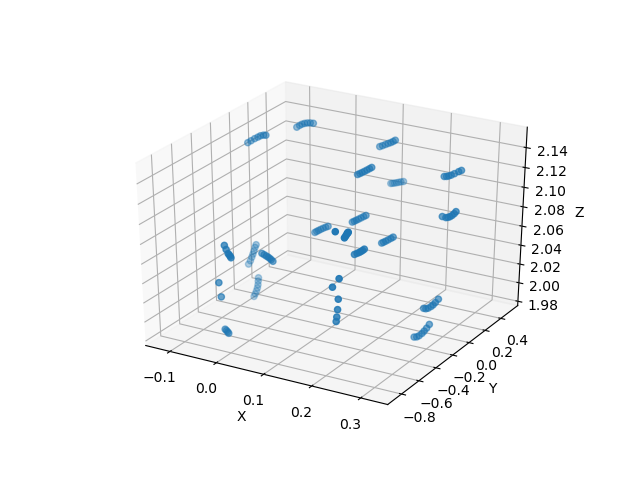

<IPython.core.display.Javascript object>


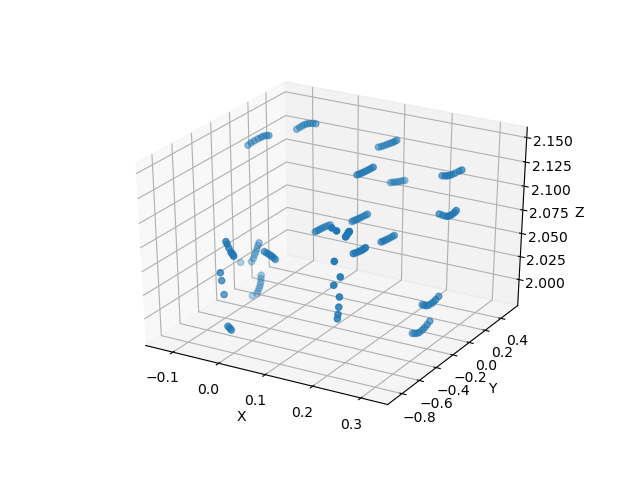

<IPython.core.display.Javascript object>


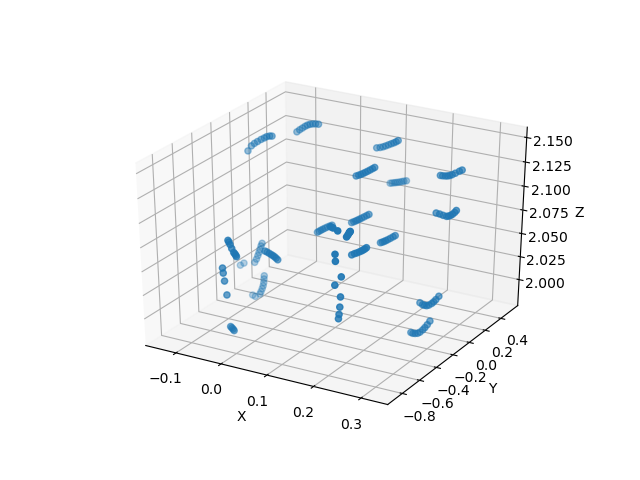

<IPython.core.display.Javascript object>


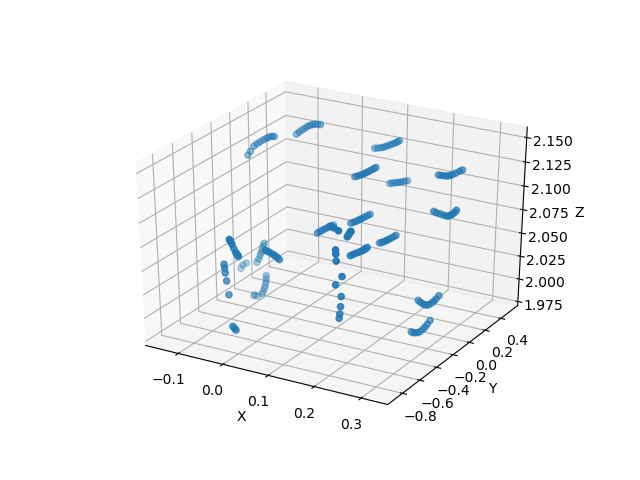

<IPython.core.display.Javascript object>


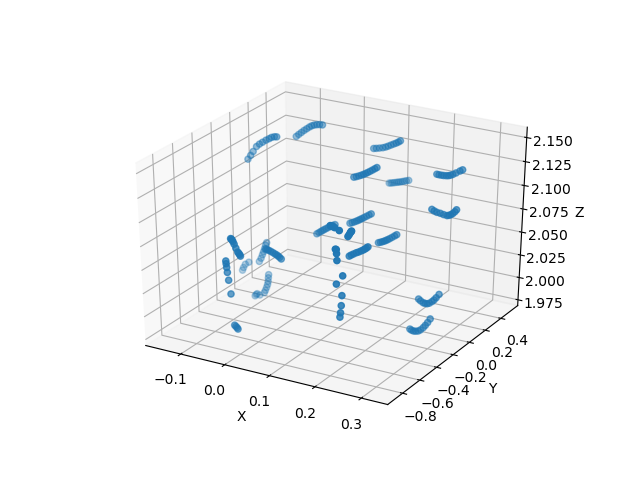

<IPython.core.display.Javascript object>


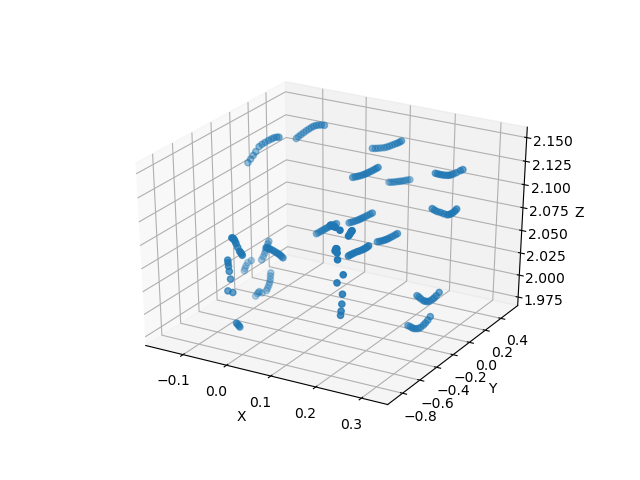

<IPython.core.display.Javascript object>


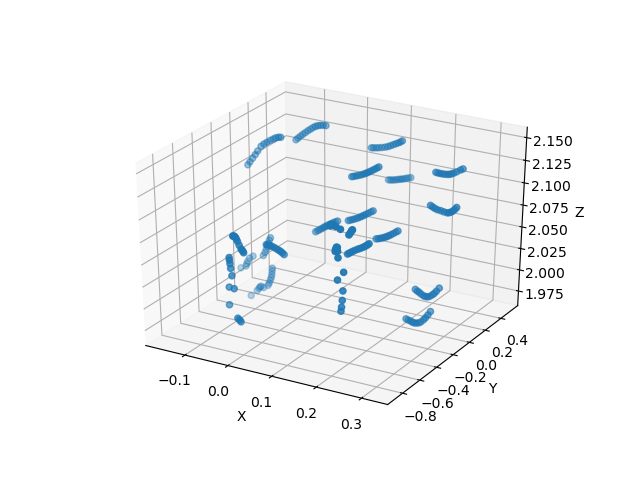

<IPython.core.display.Javascript object>


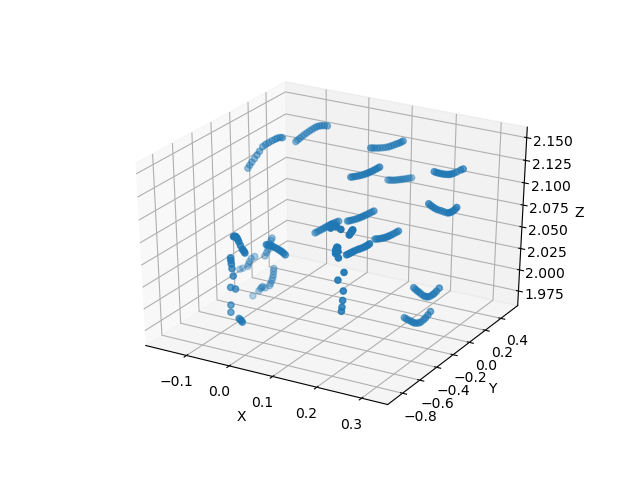

<IPython.core.display.Javascript object>


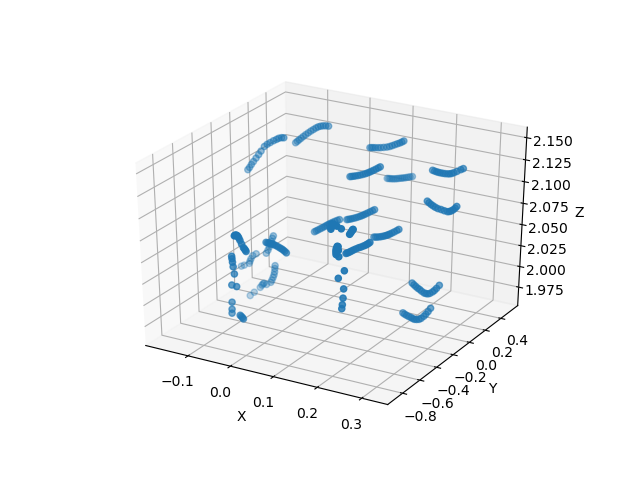

<IPython.core.display.Javascript object>


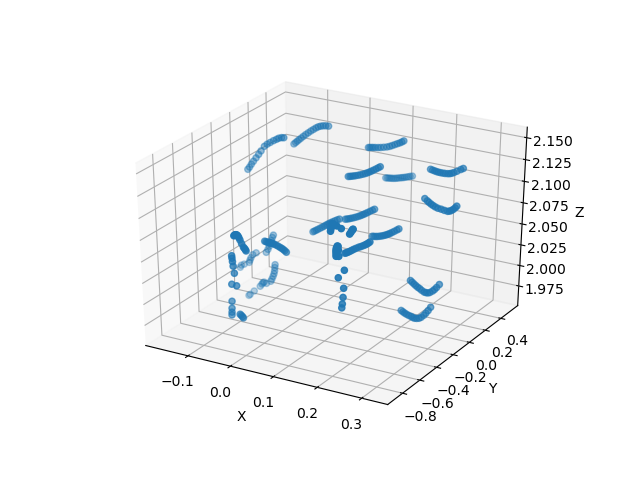

<IPython.core.display.Javascript object>


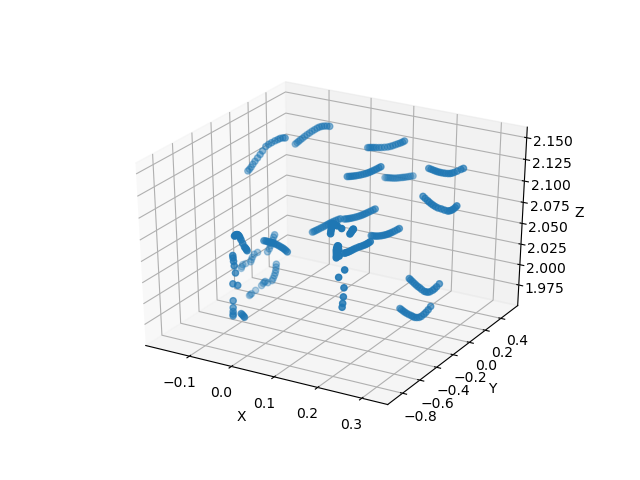

<IPython.core.display.Javascript object>


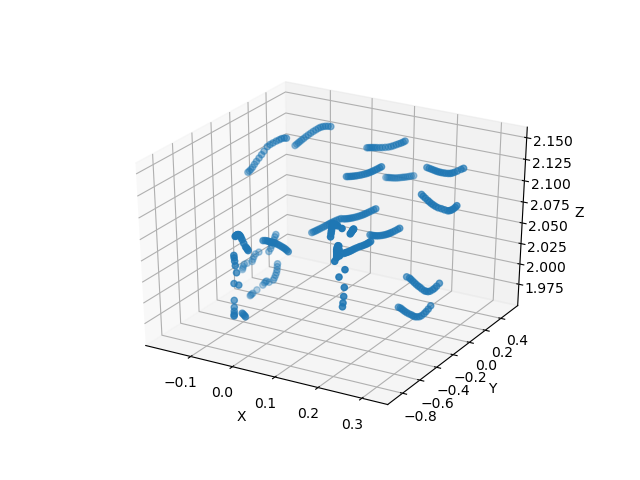

<IPython.core.display.Javascript object>


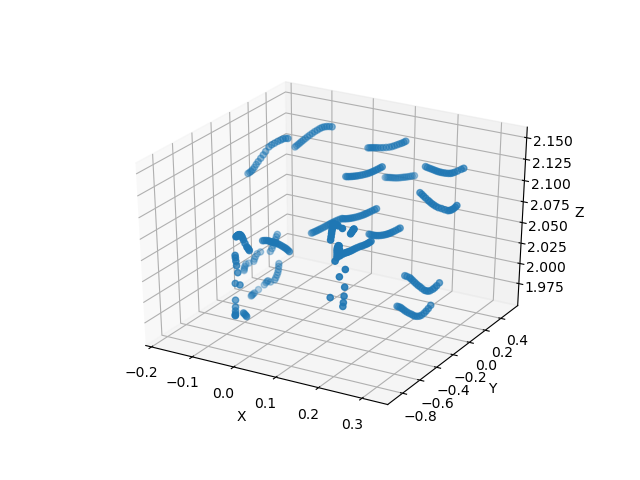

<IPython.core.display.Javascript object>


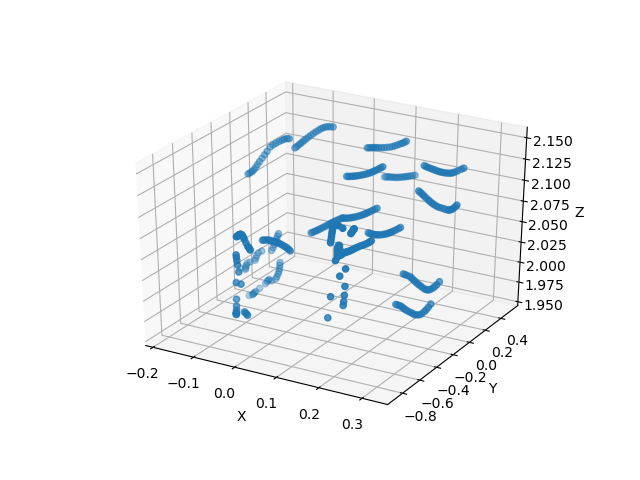

<IPython.core.display.Javascript object>


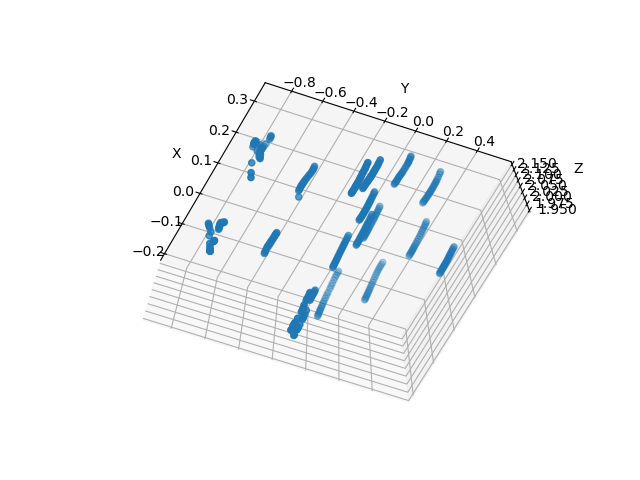

In [56]:
# each frame has 20 joints
# each action has number of frames
# moving of frames create an action
# a dictionary that tells no of frames for each each could help simulating the animation of each action.
# joints could be plotted and 3D anim could be generated with suitable interval

import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
X = np.load('MSR Daily Skeletons.npy',allow_pickle=True)


action = 0

x,y,z= [],[],[]    
xyz = 0

for joint in range(400):
    x.append(X[action][joint][xyz][0])
    y.append(X[action][joint][xyz][1])
    z.append(X[action][joint][xyz][2])    
    if joint%19==0 and joint !=0 :
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        for m in [('o')]:    
            ax.scatter(x, y, z, marker=m)

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()        